----- Grundläggande info från csv -----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1851 entries, 0 to 1850
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   store_name                  1851 non-null   object 
 1   product_name                1851 non-null   object 
 2   product_id                  1851 non-null   int64  
 3   product_code                1804 non-null   float64
 4   current_stock               1851 non-null   float64
 5   stock_warning_limit         1851 non-null   int64  
 6   predicted_sales_units       1851 non-null   float64
 7   expected_stock_after_sales  1851 non-null   float64
 8   fill_up_quantity            1851 non-null   float64
 9   needs_refill                1851 non-null   bool   
dtypes: bool(1), float64(5), int64(2), object(2)
memory usage: 132.1+ KB
None

Första fem raderna:
     store_name                                product_name  product_i

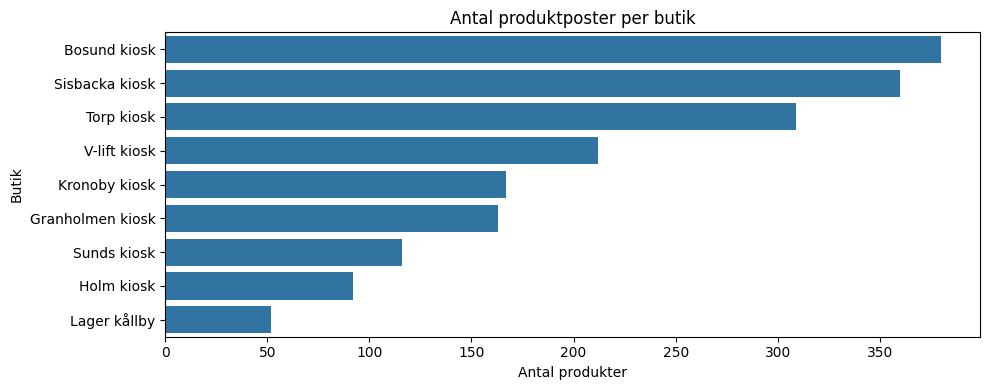

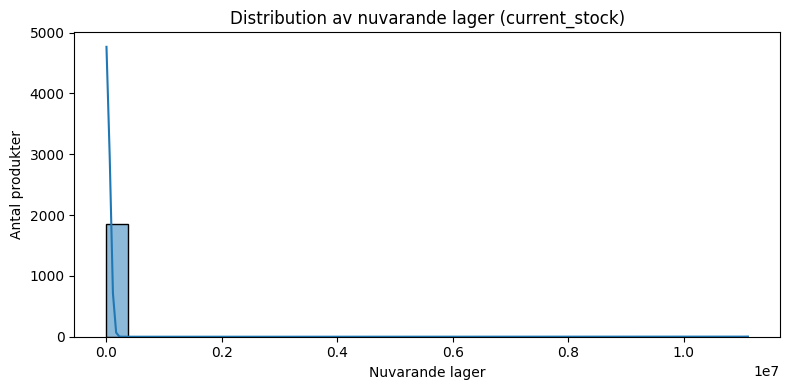

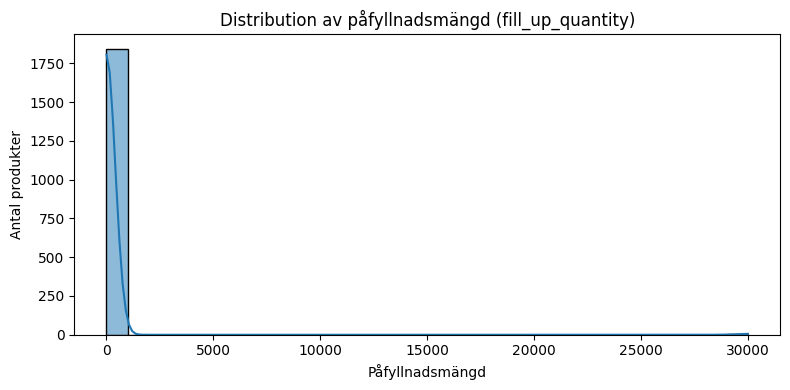

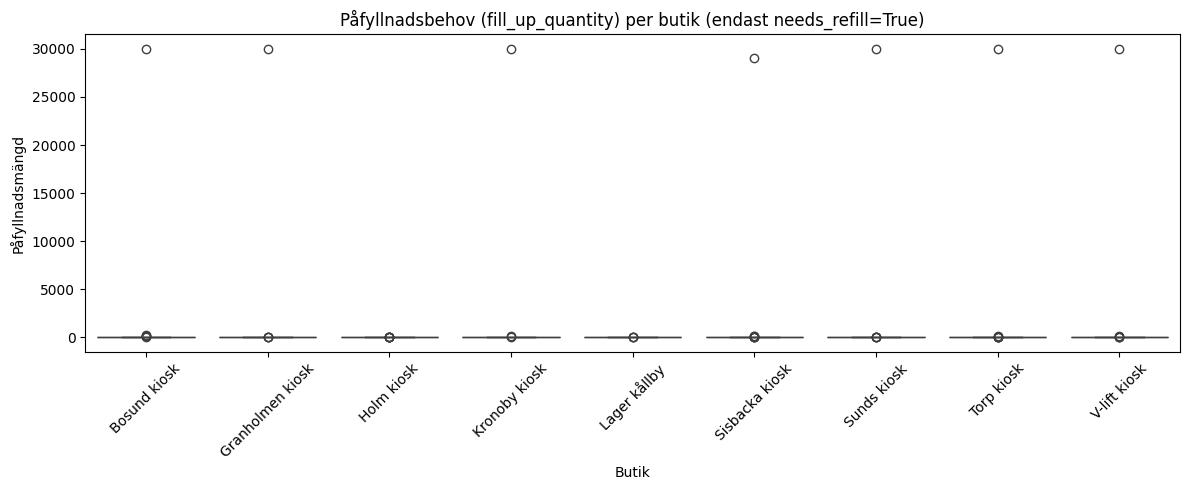

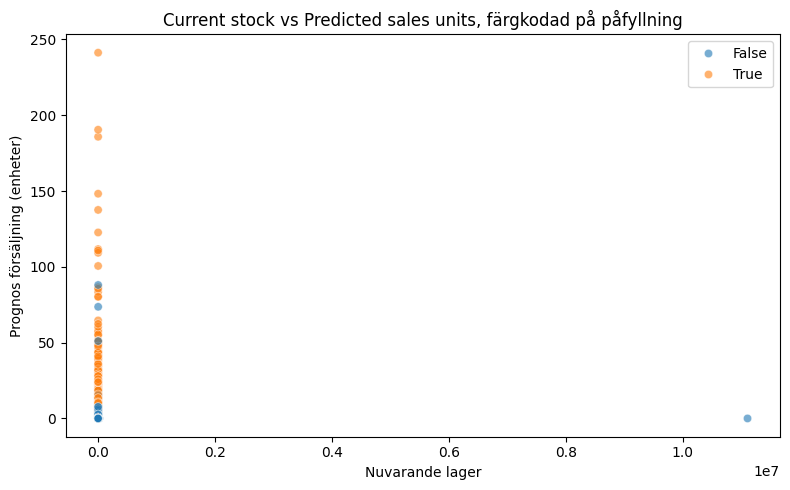

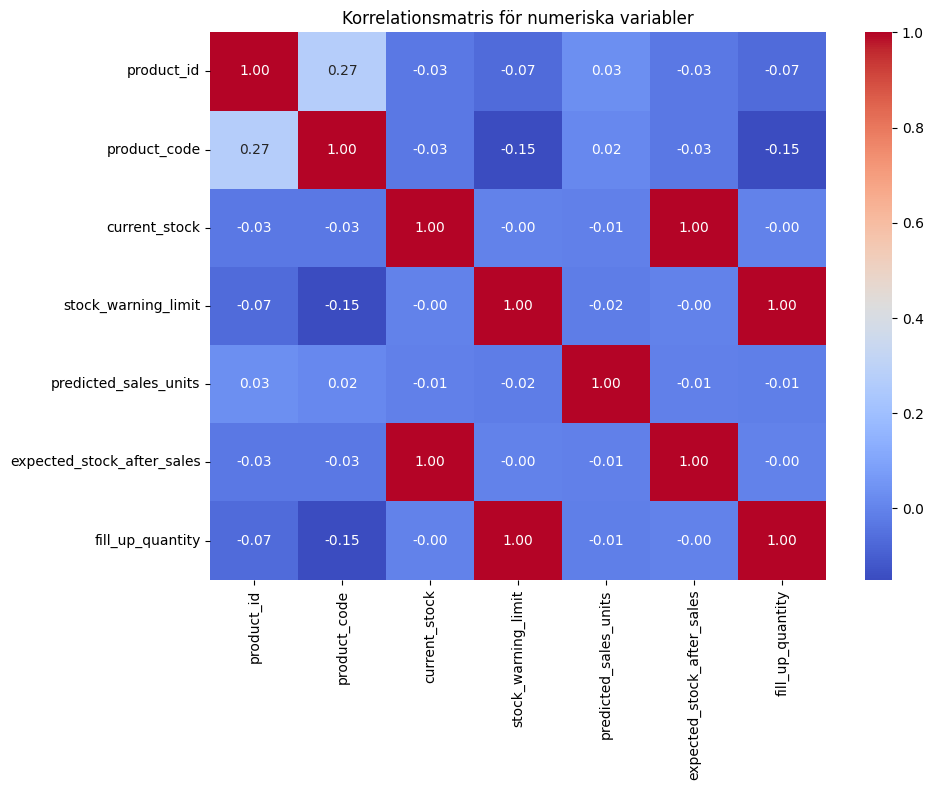


Topp 15 produkter med störst påfyllnadsbehov:
            store_name                     product_name  fill_up_quantity  \
1330        Torp kiosk  Tomat ARDILES (Röd plommon) LÖS      30000.000000   
1214       Sunds kiosk  Tomat ARDILES (Röd plommon) LÖS      30000.000000   
635      Kronoby kiosk  Tomat ARDILES (Röd plommon) LÖS      29999.416000   
1639      V-lift kiosk  Tomat ARDILES (Röd plommon) LÖS      29995.525000   
0         Bosund kiosk  Tomat ARDILES (Röd plommon) LÖS      29986.250000   
380   Granholmen kiosk  Tomat ARDILES (Röd plommon) LÖS      29985.972000   
854     Sisbacka kiosk  Tomat ARDILES (Röd plommon) LÖS      29028.722000   
1         Bosund kiosk       Juustoportti Lättmjölk 1 L        234.236558   
855     Sisbacka kiosk       Juustoportti Lättmjölk 1 L        190.424532   
2         Bosund kiosk           SataMaito LÄTTMJÖLK 1L        181.791861   
1331        Torp kiosk                            GURKA        148.214600   
856     Sisbacka kiosk       

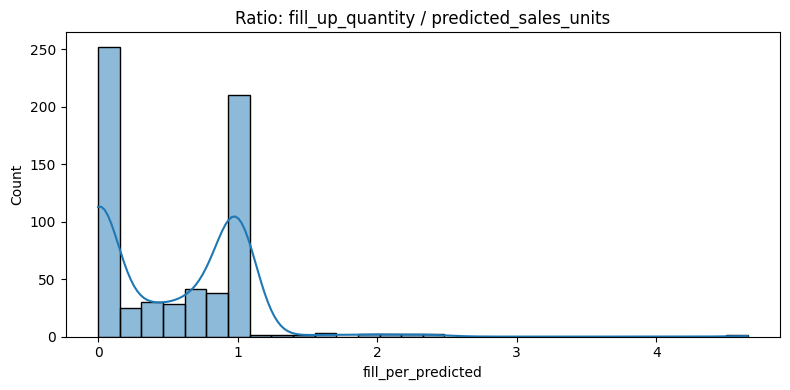

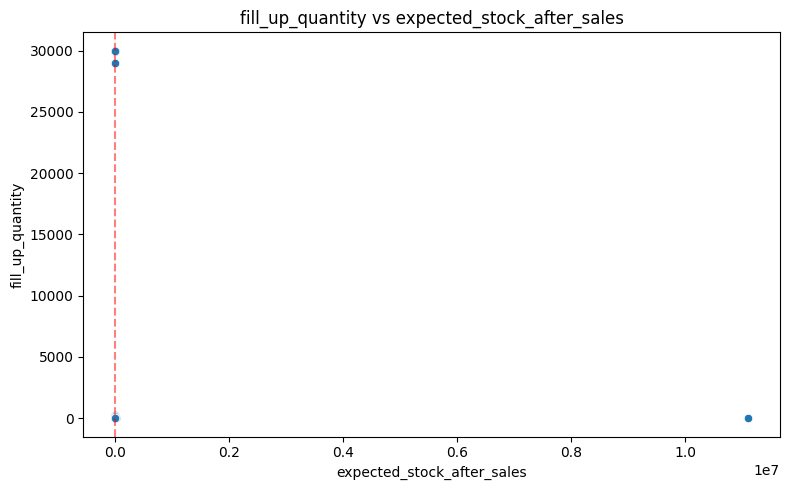

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Läs in datan
df = pd.read_csv("picking_list_results.csv")

# Grundläggande information
print("----- Grundläggande info från csv -----")
print(df.info())
print("\nFörsta fem raderna:")
print(df.head())
print("\nSista fem raderna:")
print(df.tail())

print("\nKolumner:")
print(df.columns.tolist())

print("\nSaknade värden per kolumn:\n", df.isna().sum())

# Grundläggande statistik
print("\n----- Grundläggande statistik -----")
print(df.describe(include='all'))

# Kategoriska kolumner - Unika värden och frekvenser
print("\nUnika butiker:", df['store_name'].nunique())
print(df['store_name'].value_counts())

print("\nUnika produkter:", df['product_name'].nunique())
print(df['product_name'].value_counts().head(10))

# needs_refill kolumnen - hur många True/False?
print("\nPåfyllningsbehov (needs_refill):")
print(df['needs_refill'].value_counts())

# Plot antal produkter per butik
plt.figure(figsize=(10,4))
sns.countplot(data=df, y="store_name", order=df['store_name'].value_counts().index)
plt.title("Antal produktposter per butik")
plt.xlabel("Antal produkter")
plt.ylabel("Butik")
plt.tight_layout()
plt.show()

# Distribution av nuvarande lager (current_stock)
plt.figure(figsize=(8,4))
sns.histplot(df['current_stock'], bins=30, kde=True)
plt.title("Distribution av nuvarande lager (current_stock)")
plt.xlabel("Nuvarande lager")
plt.ylabel("Antal produkter")
plt.tight_layout()
plt.show()

# Distribution av påfyllnadsmängd (fill_up_quantity)
plt.figure(figsize=(8,4))
sns.histplot(df['fill_up_quantity'], bins=30, kde=True)
plt.title("Distribution av påfyllnadsmängd (fill_up_quantity)")
plt.xlabel("Påfyllnadsmängd")
plt.ylabel("Antal produkter")
plt.tight_layout()
plt.show()

# Boxplot - fill_up_quantity per butik, endast där påfyllning behövs
plt.figure(figsize=(12,5))
sns.boxplot(data=df[df['needs_refill']], x="store_name", y="fill_up_quantity")
plt.title("Påfyllnadsbehov (fill_up_quantity) per butik (endast needs_refill=True)")
plt.ylabel("Påfyllnadsmängd")
plt.xlabel("Butik")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Hur fördelar sig needs_refill över current_stock och predicted_sales_units?
plt.figure(figsize=(8,5))
sns.scatterplot(
    data=df, 
    x="current_stock", 
    y="predicted_sales_units", 
    hue="needs_refill",
    alpha=0.6
)
plt.title("Current stock vs Predicted sales units, färgkodad på påfyllning")
plt.xlabel("Nuvarande lager")
plt.ylabel("Prognos försäljning (enheter)")
plt.legend()
plt.tight_layout()
plt.show()

# Korrelationsmatris för numeriska kolumner
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Korrelationsmatris för numeriska variabler")
plt.tight_layout()
plt.show()

# Undersök produkter med väldigt högt påfyllnadsbehov
top_fill_up = df.sort_values('fill_up_quantity', ascending=False).head(15)
print("\nTopp 15 produkter med störst påfyllnadsbehov:")
print(top_fill_up[['store_name', 'product_name', 'fill_up_quantity', 'current_stock', 'stock_warning_limit']])

# Antal produkter som behöver fyllas på per butik
refill_by_store = df[df['needs_refill']].groupby("store_name")['product_name'].count()
print("\nAntal produkter per butik som behöver fyllas på:")
print(refill_by_store)

# Summerat påfyllnadsbehov per butik (liter, gram, st - beroende på produkt)
sum_fill_by_store = df[df['needs_refill']].groupby("store_name")['fill_up_quantity'].sum()
print("\nTotal påfyllnad att leverera per butik (sum fill_up_quantity):")
print(sum_fill_by_store)

# Finns det negativa expected_stock_after_sales? (dvs man säljer mer än allt i lager!)
negatives = df[df['expected_stock_after_sales'] < 0]
print("\nAntal rader med negativ expected_stock_after_sales:", len(negatives))

# Vilka produkter får negativt saldo? Ta några exempel
if not negatives.empty:
    print(negatives[['store_name', 'product_name', 'current_stock', 'predicted_sales_units', 'expected_stock_after_sales']].head(10))

# Tittar på extremes: vilka produkter har väldigt låg 'stock_warning_limit'?
min_limit = df.sort_values("stock_warning_limit").head(10)
print("\nProdukter med lägst stock_warning_limit:")
print(min_limit[['store_name','product_name','stock_warning_limit','fill_up_quantity']])

# Tittar på extremes: väldigt högt stock_warning_limit
max_limit = df.sort_values("stock_warning_limit", ascending=False).head(10)
print("\nProdukter med högst stock_warning_limit:")
print(max_limit[['store_name','product_name','stock_warning_limit','fill_up_quantity']])

# Hur många produkter har fill_up_quantity < 0 (dvs falskt refill-behov?)
neg_fill = df[df['fill_up_quantity'] < 0]
print("\nAntal produkter med negativt påfyllnadsbehov (fill_up_quantity<0):", len(neg_fill))

# Andra intressanta plots: ratio fill_up_quantity / predicted_sales_units
df['fill_per_predicted'] = np.where(df['predicted_sales_units']!=0, df['fill_up_quantity']/df['predicted_sales_units'], np.nan)
plt.figure(figsize=(8,4))
sns.histplot(df['fill_per_predicted'].dropna(), bins=30, kde=True)
plt.title("Ratio: fill_up_quantity / predicted_sales_units")
plt.tight_layout()
plt.show()

# Kolla relation fill_up_quantity vs expected_stock_after_sales
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="expected_stock_after_sales", y="fill_up_quantity")
plt.axvline(0, ls="--", color='red', alpha=0.5)
plt.title("fill_up_quantity vs expected_stock_after_sales")
plt.tight_layout()
plt.show()
